# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I chose the airbnb data set. I will be predicting the review score of an accomodation from a scale of 0 to 5 based on its features with the label being 'review_scores_rating'. This is a supervised learning, regression problem as the label is included in the input dataset and it is generating a prediction on a continuous scale from 0 to 5 rounded to two decimal places. The features I initally believe I will use are the other review scores, number of reviews, and information about the quality of the host (verification, respond rate, profile pic). The review score of a listing is important for a company to create value as listings with higher ratings are generally more profitable than listings with lower ratings. Therefore with this information, a company can place measures such as promoting listings with high review scorings and limiting users with repeated history of listings with low review scorings.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df['review_scores_rating'])

(28022, 50)
Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_sc

In [4]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

name: 27386
description: 25952
neighborhood_overview: 15800
host_name: 7566
host_location: 1364
host_about: 11962
host_response_rate: 85
host_acceptance_rate: 101
host_is_superhost: 1
host_listings_count: 73
host_total_listings_count: 73
host_has_profile_pic: 1
host_identity_verified: 1
neighbourhood_group_cleansed: 5
room_type: 4
accommodates: 16
bathrooms: 16
bedrooms: 11
beds: 16
amenities: 25020
price: 684
minimum_nights: 95
maximum_nights: 229
minimum_minimum_nights: 98
maximum_minimum_nights: 102
minimum_maximum_nights: 206
maximum_maximum_nights: 206
minimum_nights_avg_ntm: 329
maximum_nights_avg_ntm: 452
has_availability: 2
availability_30: 31
availability_60: 61
availability_90: 91
availability_365: 366
number_of_reviews: 418
number_of_reviews_ltm: 140
number_of_reviews_l30d: 29
review_scores_rating: 154
review_scores_cleanliness: 196
review_scores_checkin: 135
review_scores_communication: 141
review_scores_location: 153
review_scores_value: 164
instant_bookable: 2
calculated_

In [5]:
df_summ = df.describe()
df_summ

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [6]:
df.describe(include = 'all')

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,28017,27452,18206,28022,27962,17077,16179.000000,16909.000000,28022,28022.000000,...,28022.000000,28022.000000,28022.000000,28022,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
unique,27386,25952,15800,7566,1364,11962,NaN,NaN,1,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Water View King Bed Hotel Room,Welcome to UNTITLED (Adj.) at 3 Freeman Alley!...,We're located in a safe and quiet residential ...,Karen,"New York, New York, United States",I’m a New York native that loves to eat & enjo...,NaN,NaN,True,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,27,61,34,246,16059,191,NaN,NaN,28022,NaN,...,NaN,NaN,NaN,20382,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.906901,0.791953,NaN,14.554778,...,4.808041,4.750393,4.647670,NaN,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,NaN,NaN,NaN,NaN,NaN,NaN,0.227282,0.276732,NaN,120.721287,...,0.464585,0.415717,0.518023,NaN,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.940000,0.680000,NaN,1.000000,...,4.810000,4.670000,4.550000,NaN,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910000,NaN,1.000000,...,4.970000,4.880000,4.780000,NaN,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,3.000000,...,5.000000,5.000000,5.000000,NaN,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000


In [7]:
df_summ.loc['mean'].idxmax(axis=0)

'maximum_maximum_nights'

In [8]:
np.any(df_summ.loc['min']<0)

False

In [9]:
column_ranges = df_summ.loc['max'] - df_summ.loc['min']
column_range_name = column_ranges.idxmax(axis=0)
column_range_name

'maximum_nights'

In [10]:
df['review_scores_rating'].value_counts()

5.00    8674
4.00    1180
4.50    1100
4.67     899
4.75     725
        ... 
3.17       1
2.75       1
2.58       1
3.87       1
3.64       1
Name: review_scores_rating, Length: 154, dtype: int64

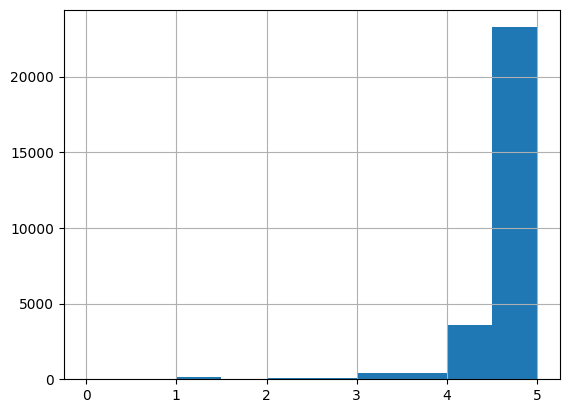

In [11]:
df['review_scores_rating'].hist()
plt.show()

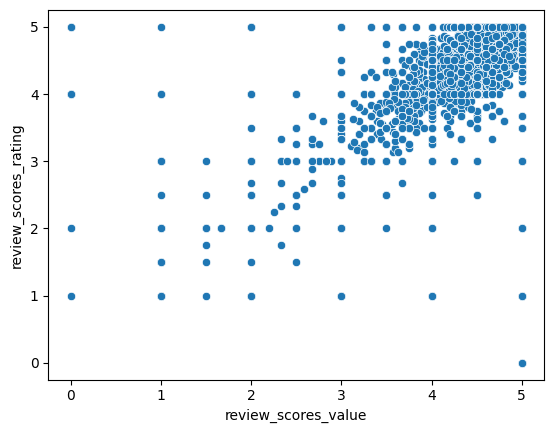

In [12]:
sns.scatterplot(x='review_scores_value', y='review_scores_rating', data=df)
plt.show()

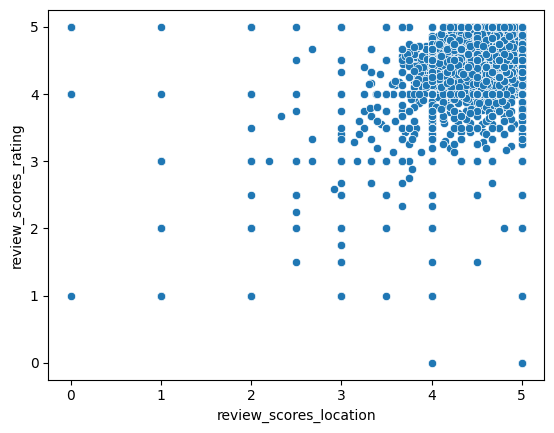

In [13]:
sns.scatterplot(x='review_scores_location', y='review_scores_rating', data=df)
plt.show()

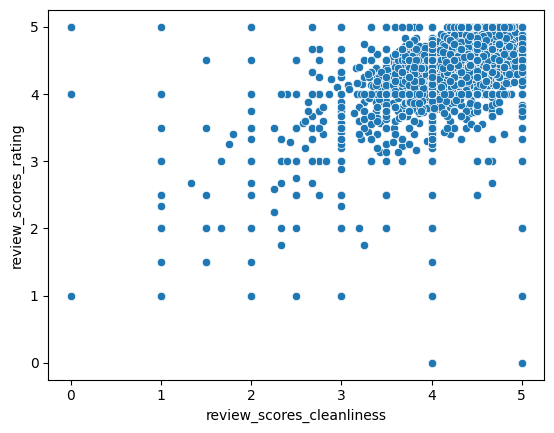

In [14]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_rating', data=df)
plt.show()

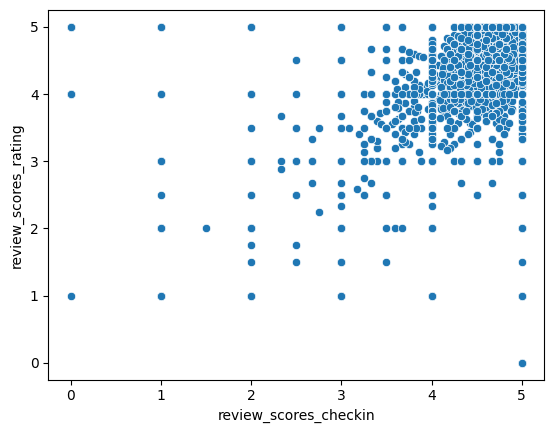

In [15]:
sns.scatterplot(x='review_scores_checkin', y='review_scores_rating', data=df)
plt.show()

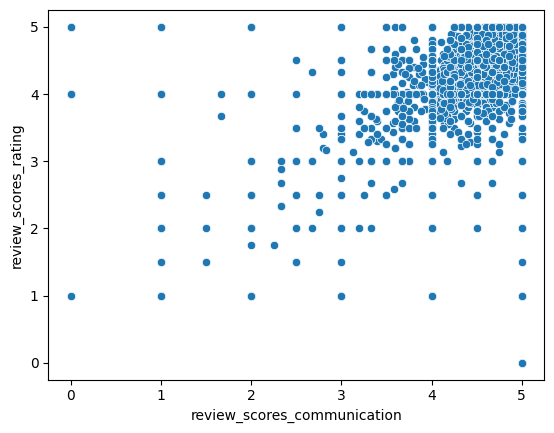

In [16]:
sns.scatterplot(x='review_scores_communication', y='review_scores_rating', data=df)
plt.show()

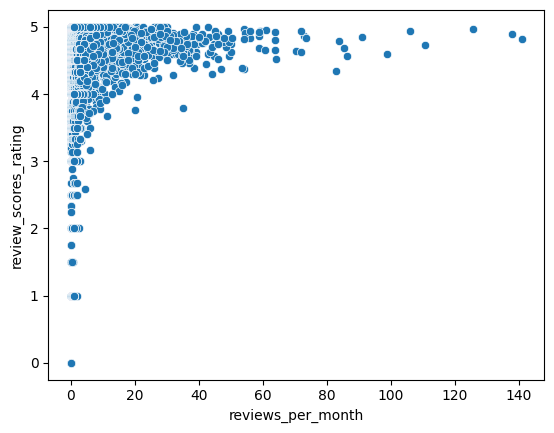

In [17]:
sns.scatterplot(x='reviews_per_month', y='review_scores_rating', data=df)
plt.show()

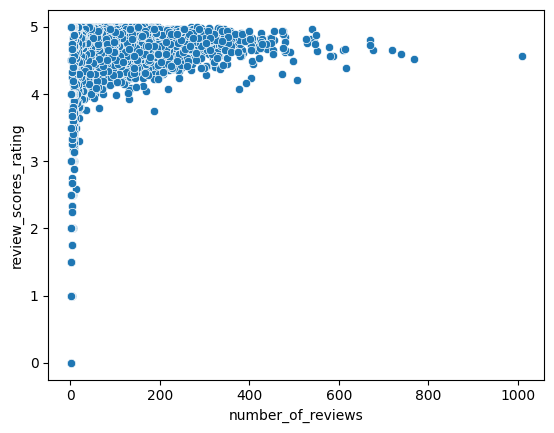

In [18]:
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', data=df)
plt.show()

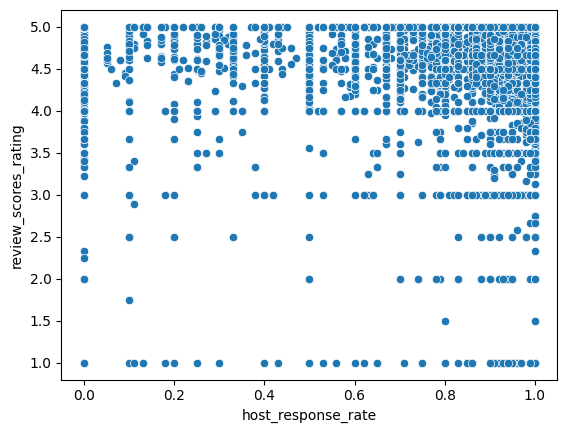

In [19]:
sns.scatterplot(x='host_response_rate', y='review_scores_rating', data=df)
plt.show()

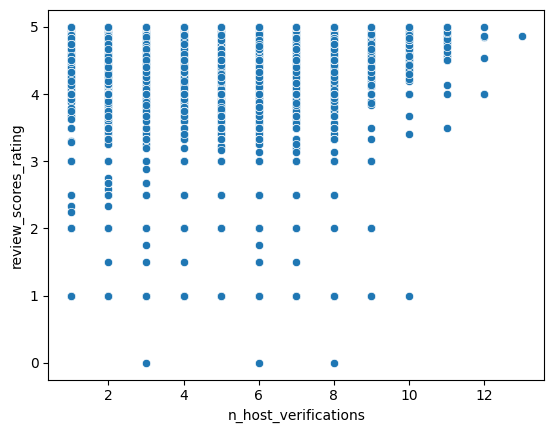

In [20]:
sns.scatterplot(x='n_host_verifications', y='review_scores_rating', data=df)
plt.show()

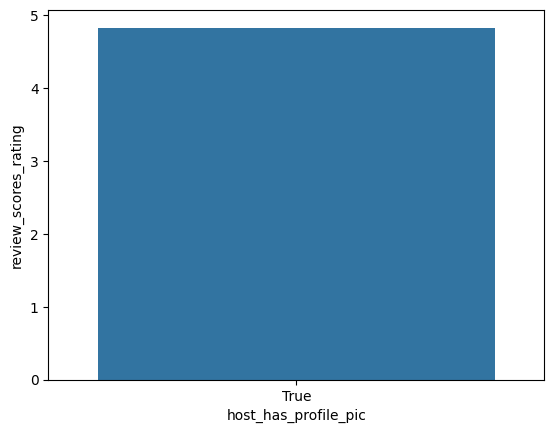

In [21]:
sns.barplot(x='host_has_profile_pic', y='review_scores_rating', data=df, estimator='median')
plt.show()

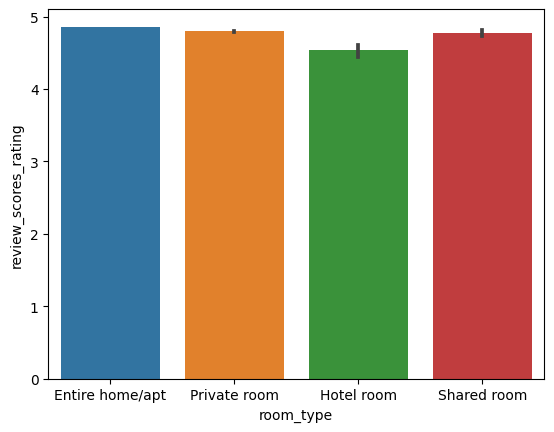

In [22]:
sns.barplot(x='room_type', y='review_scores_rating', data=df, estimator='median')
plt.show()

In [23]:
#outlier
df['new_rating'] = stats.mstats.winsorize(df['review_scores_rating'], limits=[0.01,0.01])
df['new_rating']
(df['new_rating'] - df['review_scores_rating']).unique()
#not suprising bc data is so left skewed that lower ratings are considered outliers
#chose not to use the new_rating as all values fall under 0 to 5
df.drop('new_rating', axis=1, inplace=True)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After plotting, the other review_score features seem to have a high correlation with the label, so I will keep that. Number of reviews did not have a high, positive correlation with the label, so I will not plan on using that. In addition, the measures of quality of host that I initially predicted did not have a high correlation either. In fact, the 'host_has_profile_pic' feature has only one value, True, rendering it unhelpful and something I will remove. Through preparing and cleaning my data, I hope to transform relevant features to numerical values to find their correlation with the label, which will hopefully provide more insight. 

Some data preparation techniques I plan on doing are handling missing values, feature engineering particularly for features with object and boolean datatypes, and building a correlation matrix to find the most correlated features for the label. To address the skewedness of the data, I will use undersampling to balance the dataset.

For this regression problem, I plan on testing several models including linear regression, random forest regressor, and a gradient boosting regressor - main focus. Linear regression will serve as a baseline model for comparison, while random forest can provide great interprebility and feature importance and gradient boosting can handle the complex interactions in the large dataset. I will split the data, fit the model, and tune the hyperparameters based on the GridSearch technique. Finally, I will evaluate my model using the validation set and cross-validate using KFold technique to get a reliable recognition of model performance. Based on the performance and statistical analysis, I will go back and tweak parts of the process as necessary such as addressing common issues like overfitting.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [24]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

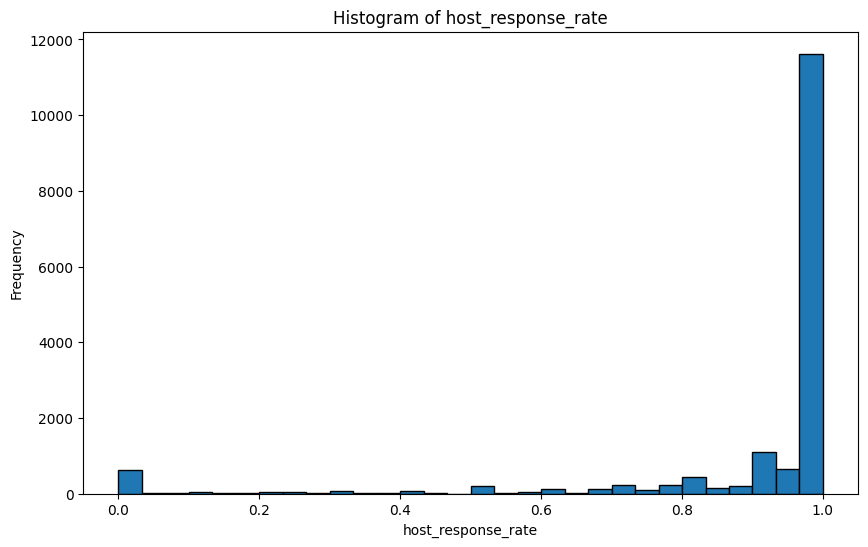

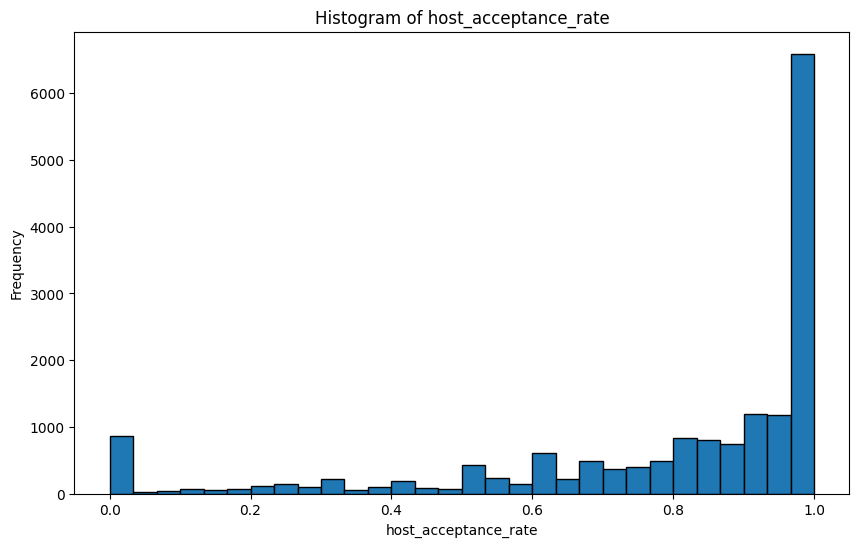

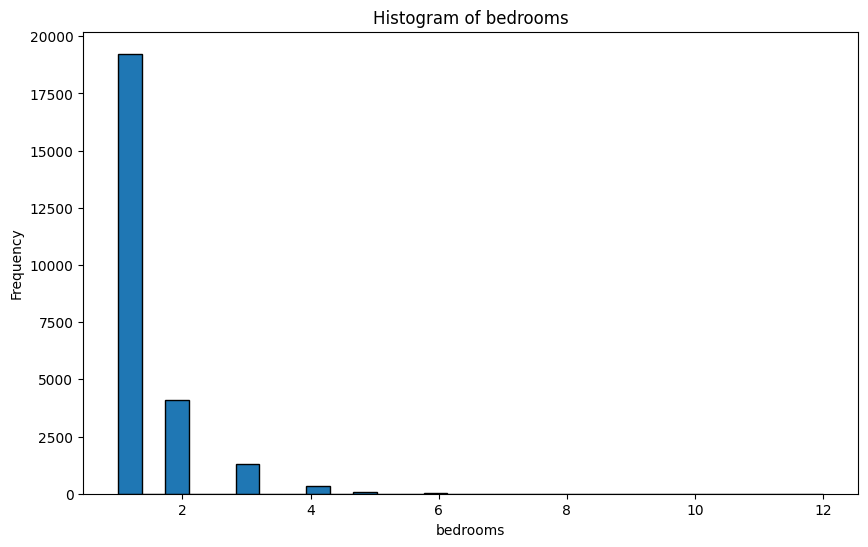

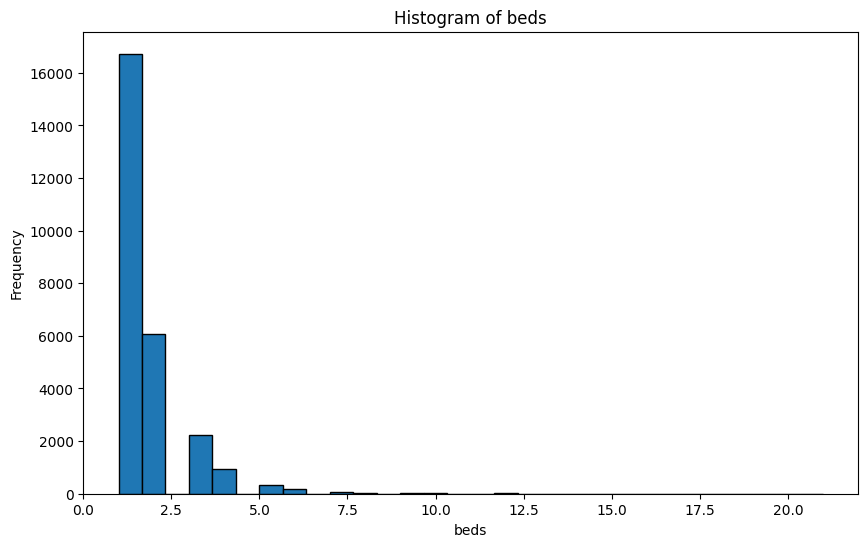

In [25]:
#missing values
nan_count = np.sum(df.isnull(), axis = 0)
nan_count
is_int_or_float = (df.dtypes == 'int64')|(df.dtypes == 'float64') 
is_int_or_float
to_impute = (nan_count!=0) & is_int_or_float
impute_col = df.columns[to_impute]
nan_count[to_impute]
for colname in impute_col:
    df[colname + '_na'] = df[colname].isnull()
df.head()

#histograms
for colname in impute_col:
    plt.figure(figsize=(10, 6))
    df[colname].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {colname}')
    plt.xlabel(colname)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [26]:
#replacing missing values
for colname in impute_col:
    df[colname].fillna(df[colname].median(), inplace=True)
to_impute
print(nan_count)
string_missing_col = ['name', 'host_location', 'description', 'neighborhood_overview','host_about']
string_missing_col
df.drop(string_missing_col, axis=1, inplace=True)
df.columns

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

Index(['host_name', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_

In [27]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

host_name                                       0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_group_cleansed                    0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0


In [28]:
#feature-engineering
#remove irrv features
is_bool_or_obj = (df.dtypes == 'bool')|(df.dtypes == 'object') 
encoding_cols = df.columns[is_bool_or_obj]
print(encoding_cols)
for col in encoding_cols:
    num_unique = df[col].nunique()
    if (num_unique == 1) | (num_unique > 10):
        df.drop(col, axis=1, inplace=True)

Index(['host_name', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'amenities', 'has_availability', 'instant_bookable',
       'host_response_rate_na', 'host_acceptance_rate_na', 'bedrooms_na',
       'beds_na'],
      dtype='object')


In [29]:
#obj
obj_cols = df.columns[df.dtypes == 'object']
df_encoding = pd.get_dummies(df[obj_cols], prefix= obj_cols + "_")
df_encoding
df = df.join(df_encoding)
df.drop(obj_cols, axis=1, inplace=True)
df.columns

#bool
bool_cols = df.columns[df.dtypes == 'bool']
bool_cols
df_bool = df[bool_cols].astype(int)
print(df_bool)
df_combined = df.join(df_bool, lsuffix='_orig', rsuffix='_num')
df_combined.drop(bool_cols + '_orig', axis=1, inplace=True)
df_combined.head()

       has_availability  instant_bookable  host_response_rate_na  \
0                     1                 0                      0   
1                     1                 0                      0   
2                     1                 0                      0   
3                     1                 0                      0   
4                     1                 0                      1   
...                 ...               ...                    ...   
28017                 1                 1                      0   
28018                 1                 0                      0   
28019                 1                 1                      0   
28020                 1                 0                      0   
28021                 1                 1                      1   

       host_acceptance_rate_na  bedrooms_na  beds_na  
0                            0            1        0  
1                            0            0        0  
2                 

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room,has_availability_num,instant_bookable_num,host_response_rate_na_num,host_acceptance_rate_na_num,bedrooms_na_num,beds_na_num
0,0.80,0.17,8.0,8.0,1,1.0,1.0,1.0,150.0,30,...,1,0,0,0,1,0,0,0,1,0
1,0.09,0.69,1.0,1.0,3,1.0,1.0,3.0,75.0,1,...,1,0,0,0,1,0,0,0,0,0
2,1.00,0.25,1.0,1.0,4,1.5,2.0,2.0,275.0,5,...,1,0,0,0,1,0,0,0,0,0
3,1.00,1.00,1.0,1.0,2,1.0,1.0,1.0,68.0,2,...,0,0,1,0,1,0,0,0,0,0
4,1.00,0.91,1.0,1.0,1,1.0,1.0,1.0,75.0,2,...,0,0,1,0,1,0,1,1,0,0


In [30]:
#correlations
corr_matrix = round(df_combined.corr(),5)
corr_matrix
corrs = corr_matrix['review_scores_rating']
corrs_sort = corrs.sort_values(ascending=False)
corrs_sort

review_scores_rating                            1.00000
review_scores_value                             0.82063
review_scores_cleanliness                       0.75821
review_scores_communication                     0.72775
review_scores_checkin                           0.68815
review_scores_location                          0.57446
room_type__Entire home/apt                      0.09600
host_response_rate                              0.09219
number_of_reviews_l30d                          0.06743
number_of_reviews                               0.06718
neighbourhood_group_cleansed__Brooklyn          0.05120
n_host_verifications                            0.05089
number_of_reviews_ltm                           0.04560
price                                           0.04507
reviews_per_month                               0.03932
has_availability_num                            0.03040
neighbourhood_group_cleansed__Staten Island     0.01450
bedrooms                                        

In [31]:
# downsampling
high_ratings = df_combined[df_combined['review_scores_rating'] >= 4.75]
low_ratings = df_combined[df_combined['review_scores_rating'] < 4.75]
high_ratings.shape
low_ratings.shape
high_ratings_downsample = high_ratings.sample(len(low_ratings), random_state=1234)
df_balanced = pd.concat([high_ratings_downsample, low_ratings])

In [32]:
#modeling
#features
X = df_balanced.drop('review_scores_rating', axis=1, inplace=False)
y = df_balanced['review_scores_rating']

In [33]:
print(X)

       host_response_rate  host_acceptance_rate  host_listings_count  \
7615                 1.00                  0.91                  1.0   
15232                1.00                  0.91                  2.0   
10883                1.00                  0.91                  1.0   
4070                 1.00                  0.84                  0.0   
13416                1.00                  0.71                  2.0   
...                   ...                   ...                  ...   
27997                1.00                  0.80                  0.0   
28001                1.00                  0.93                  0.0   
28004                1.00                  0.99                  1.0   
28008                1.00                  1.00                  0.0   
28019                0.99                  0.99                  6.0   

       host_total_listings_count  accommodates  bathrooms  bedrooms  beds  \
7615                         1.0             2        1.0 

In [34]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

0.2562114878943591
0.7910618035543026


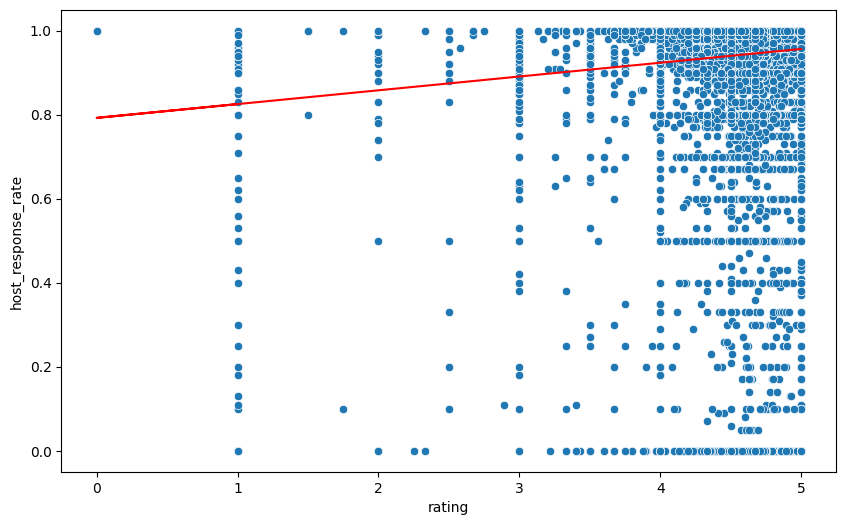

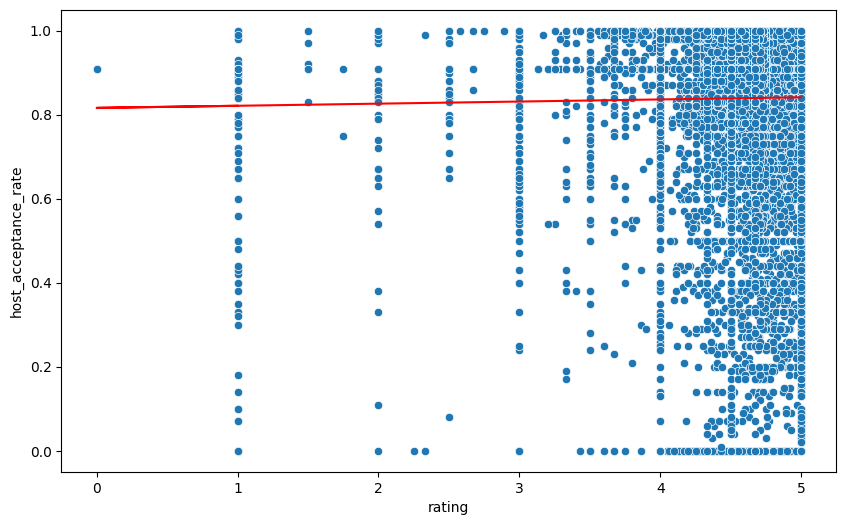

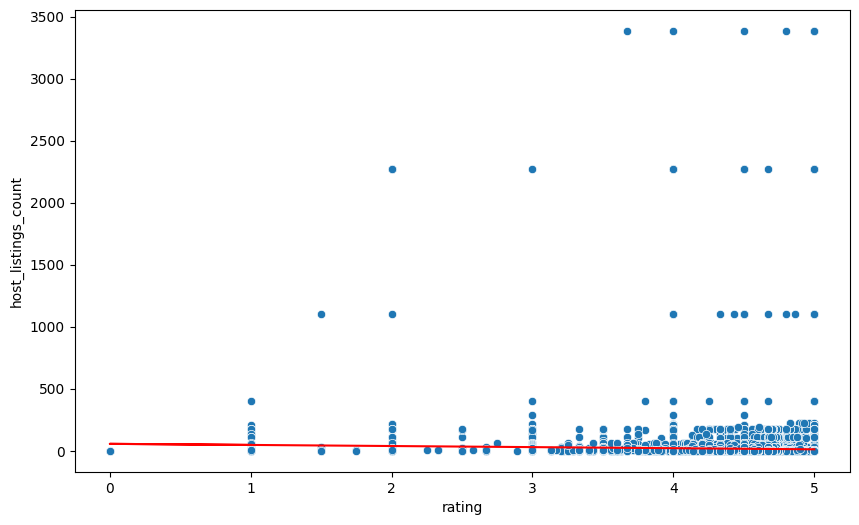

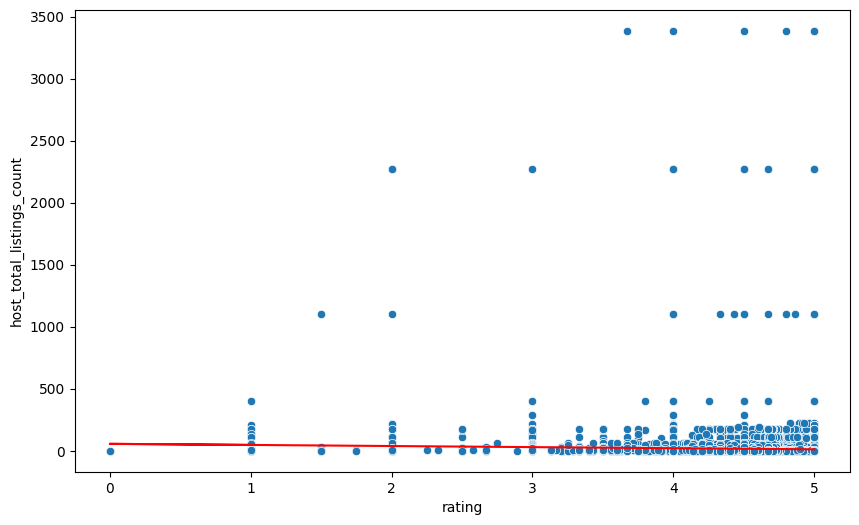

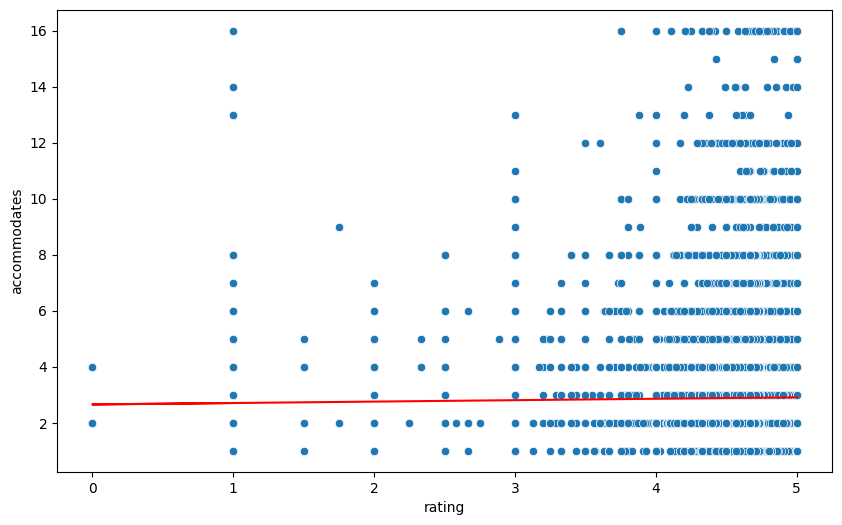

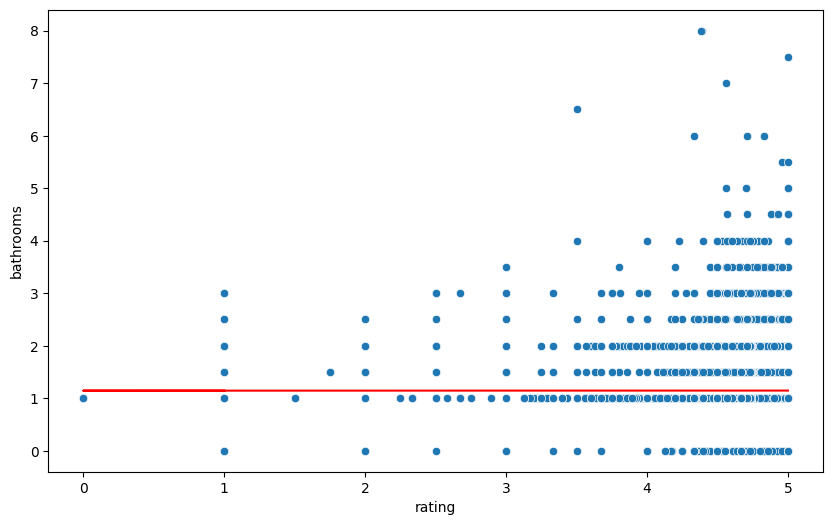

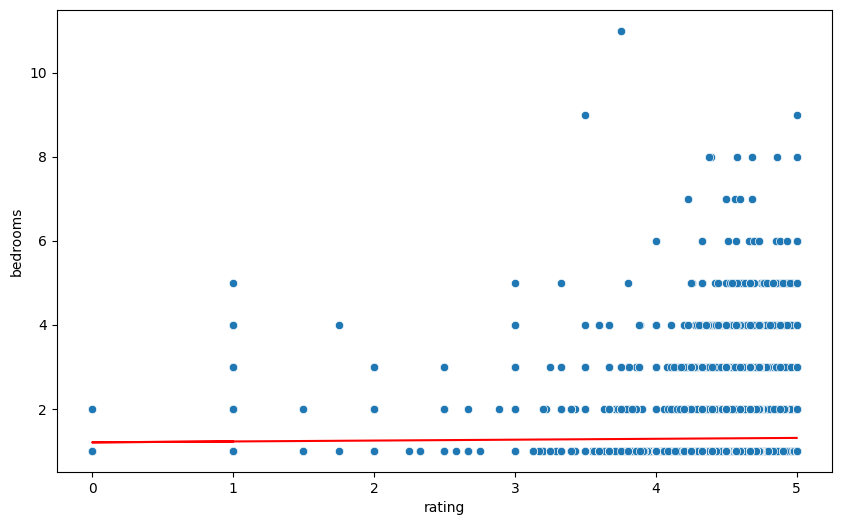

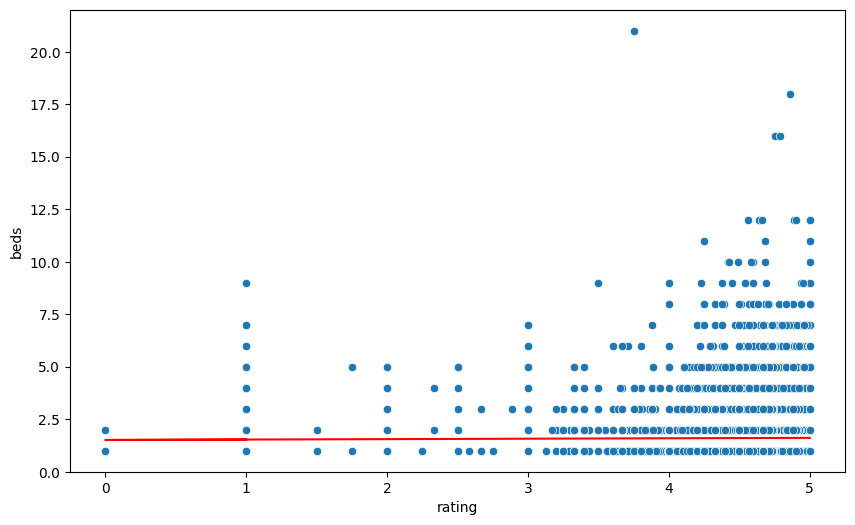

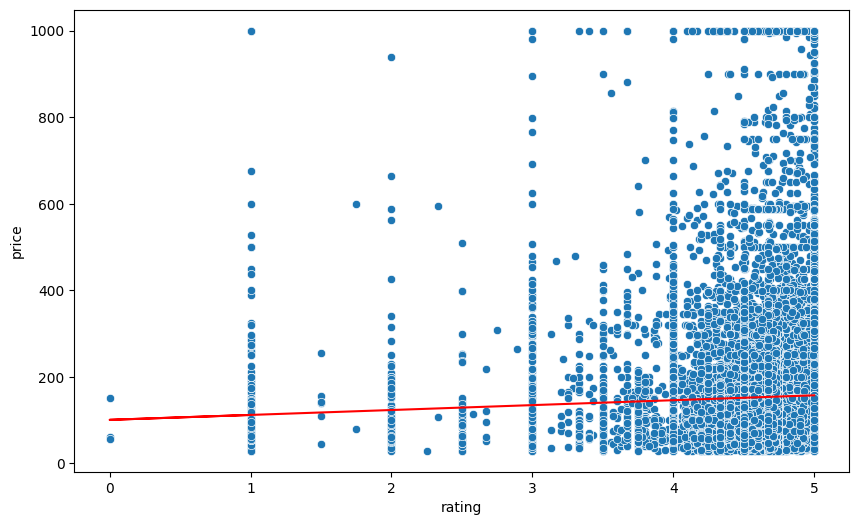

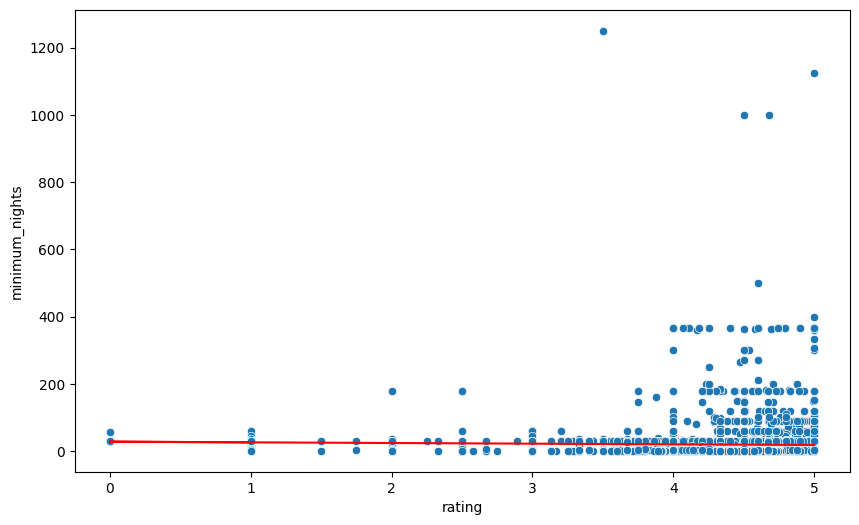

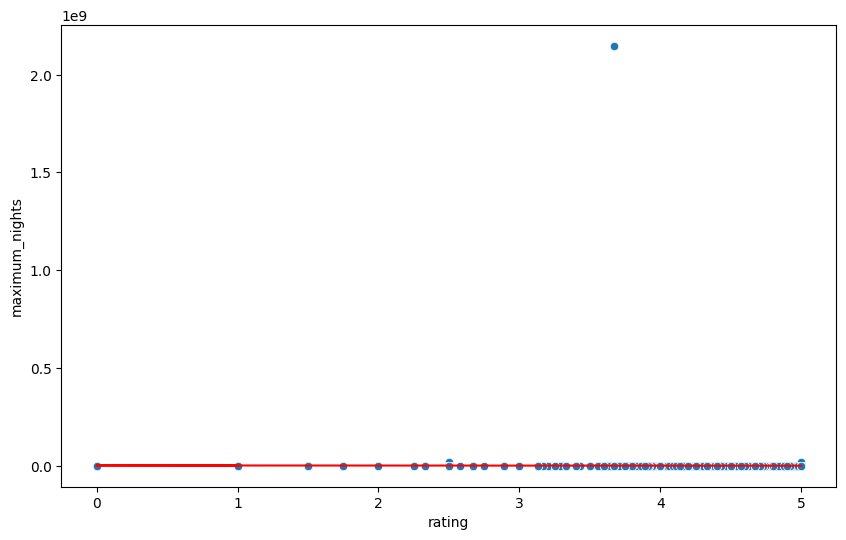

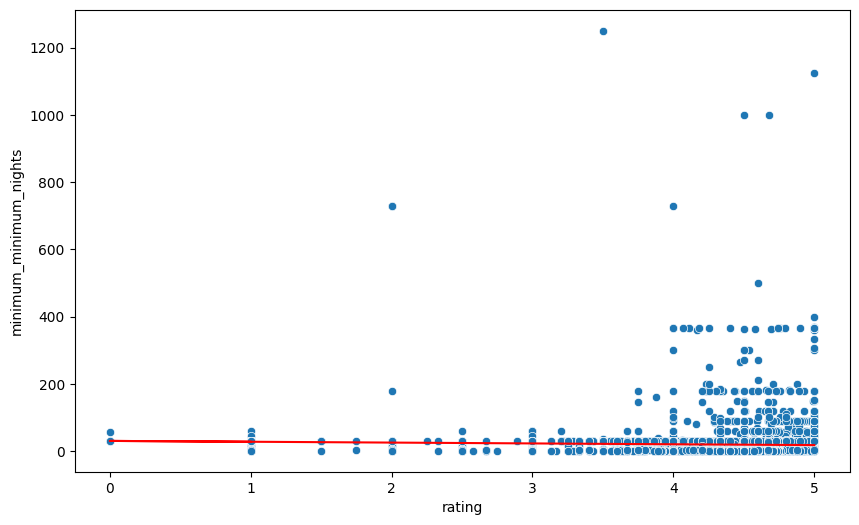

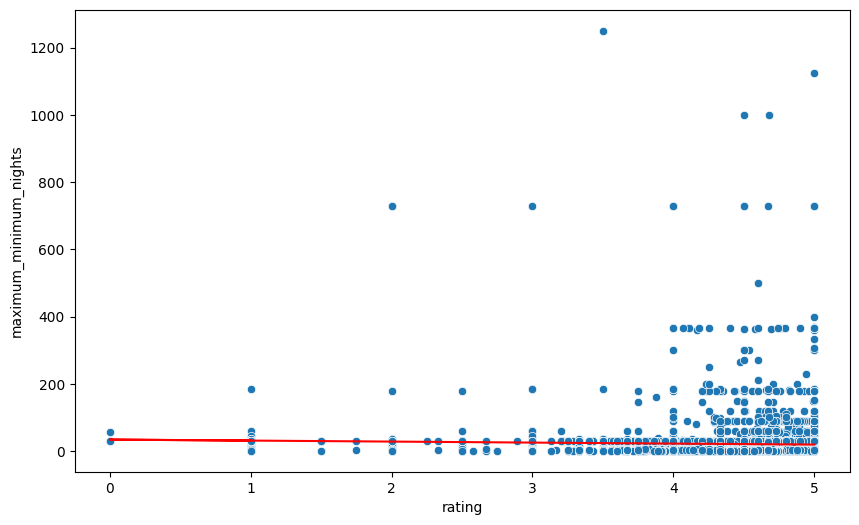

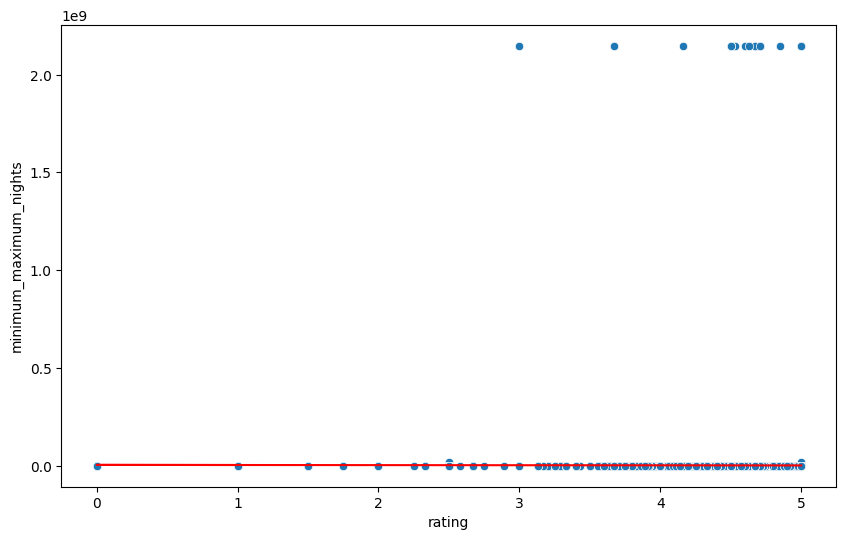

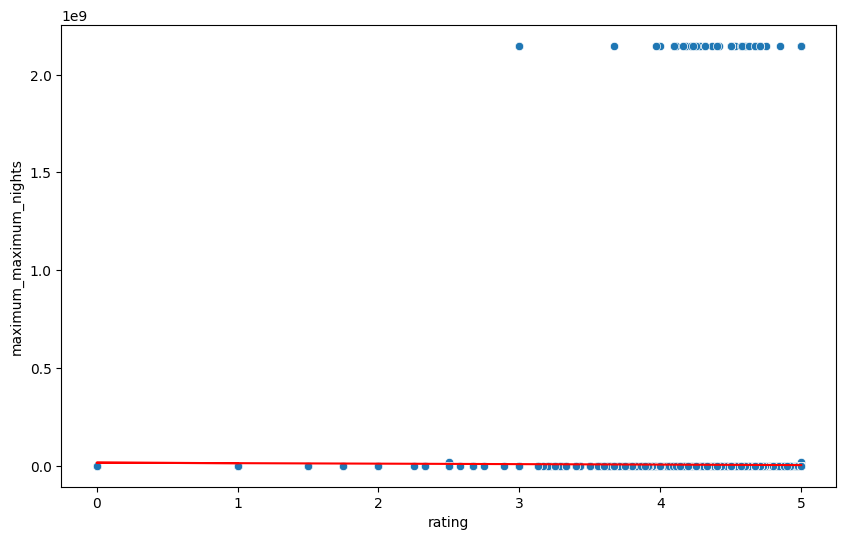

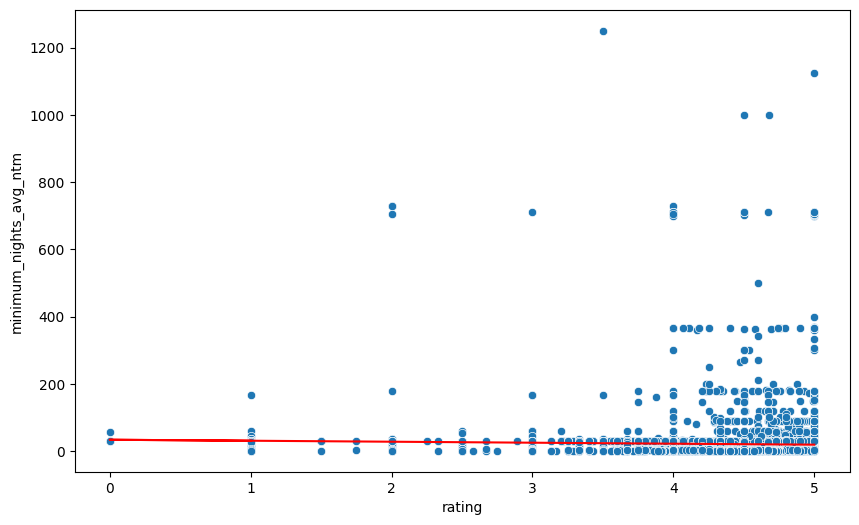

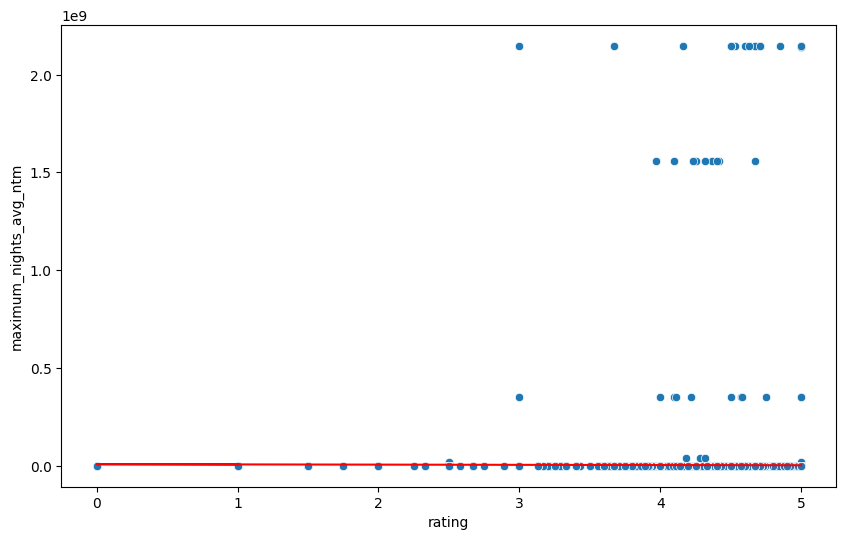

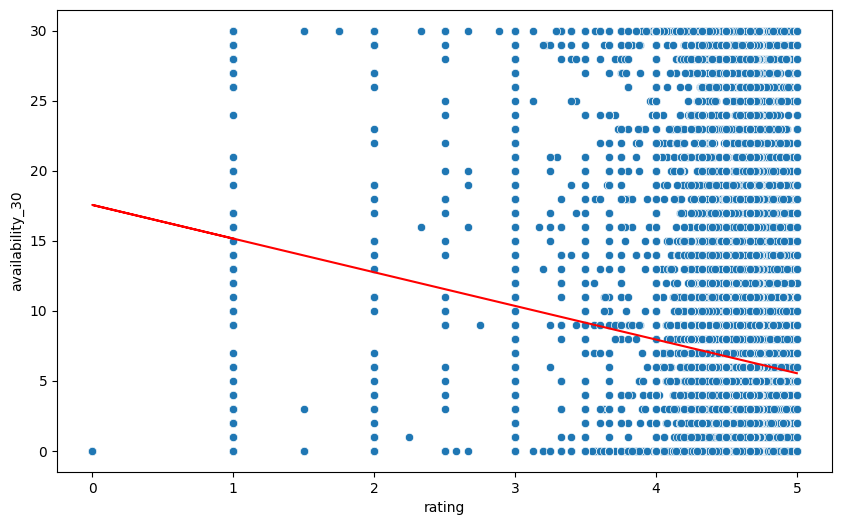

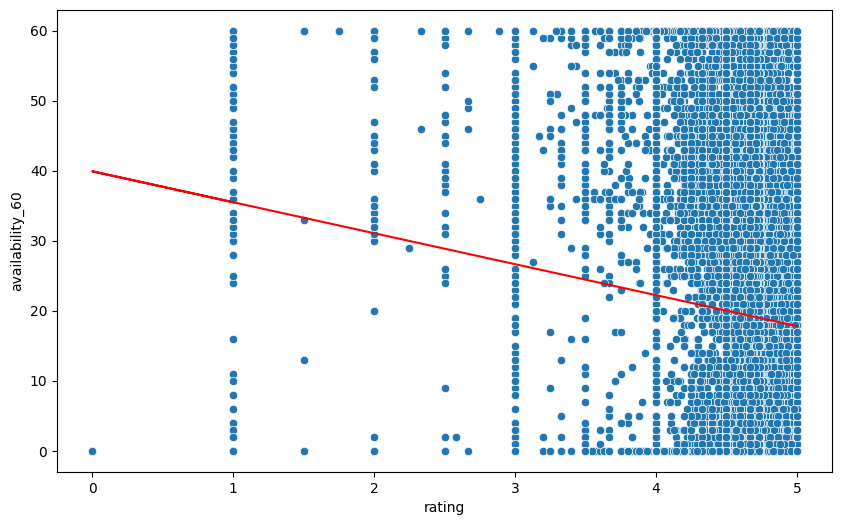

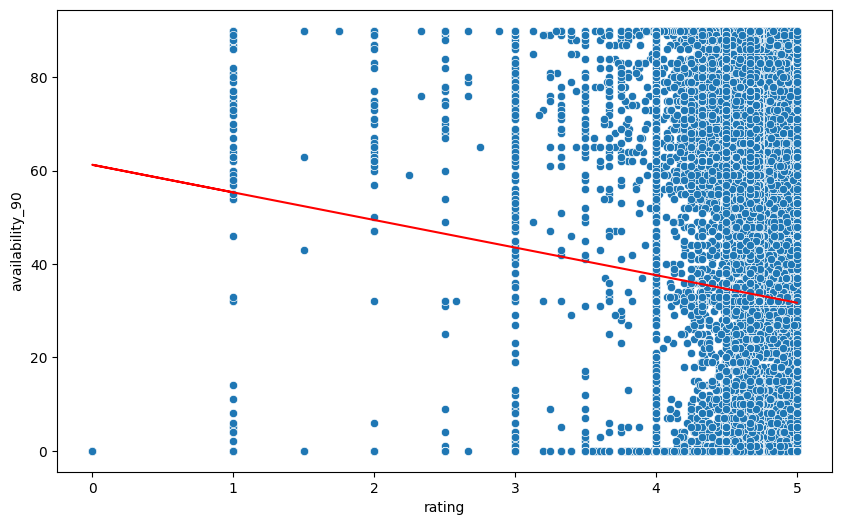

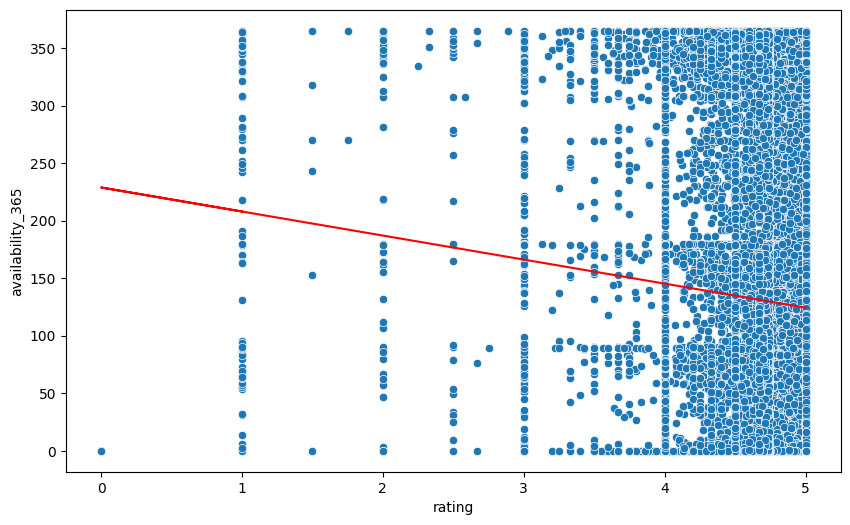

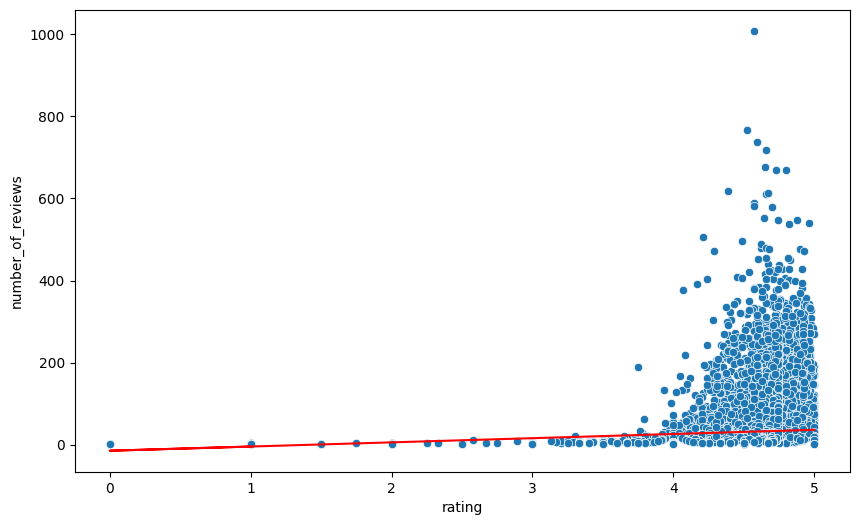

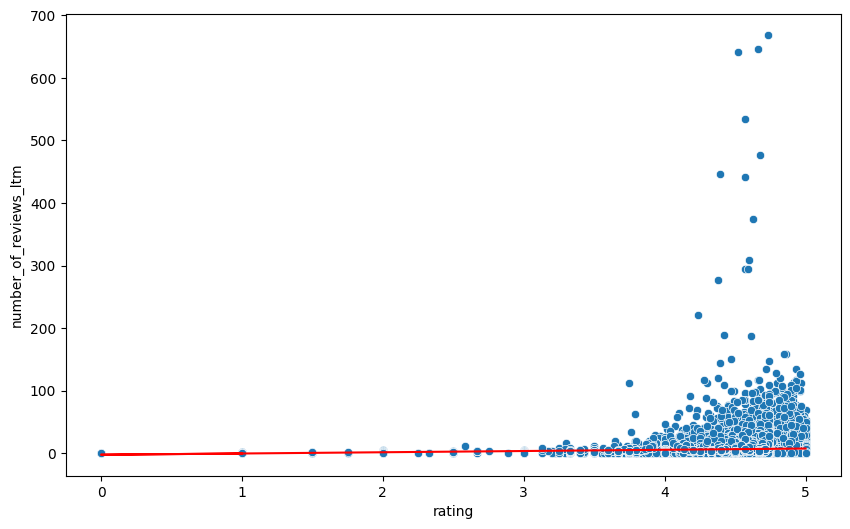

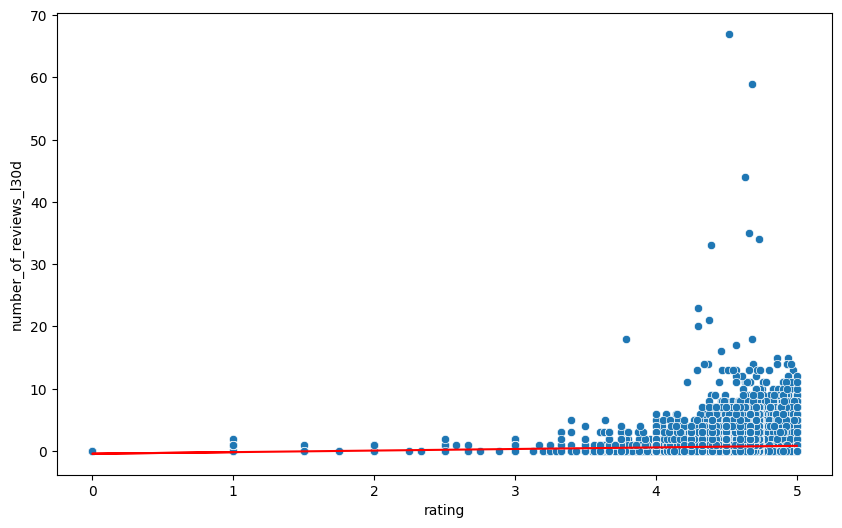

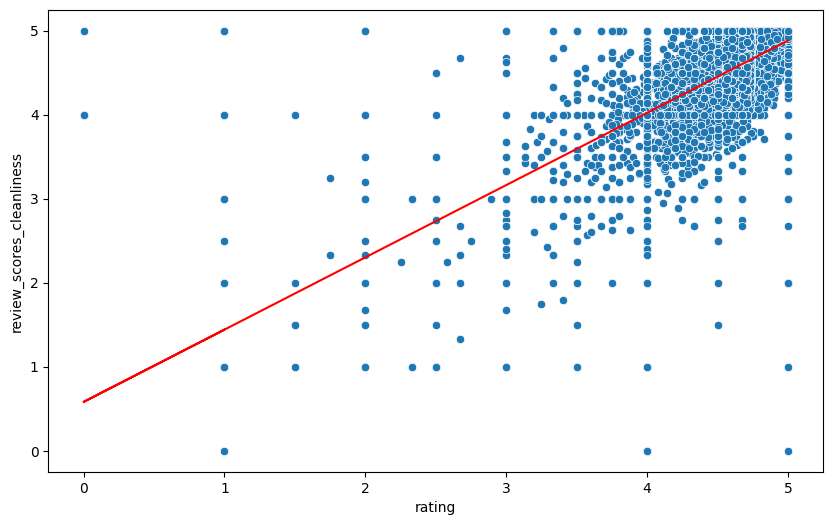

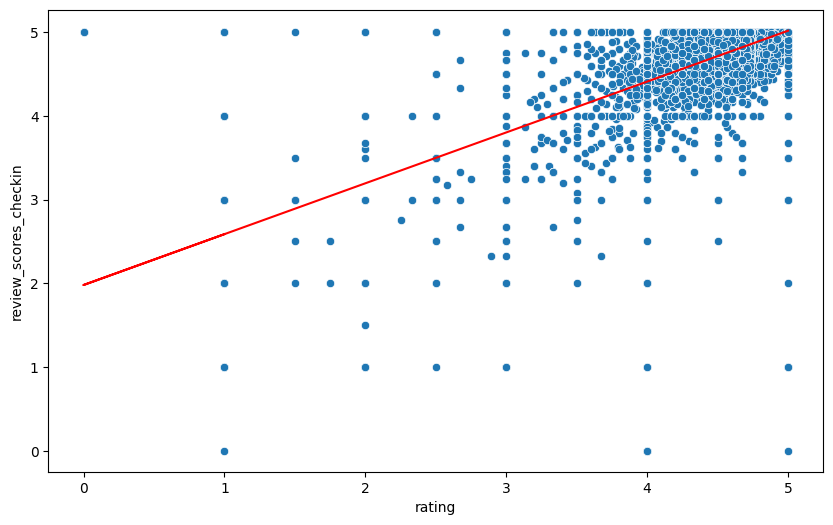

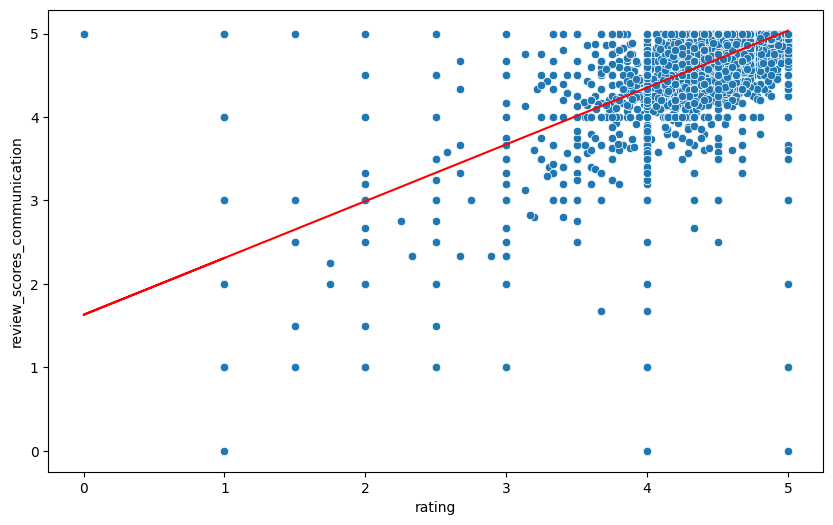

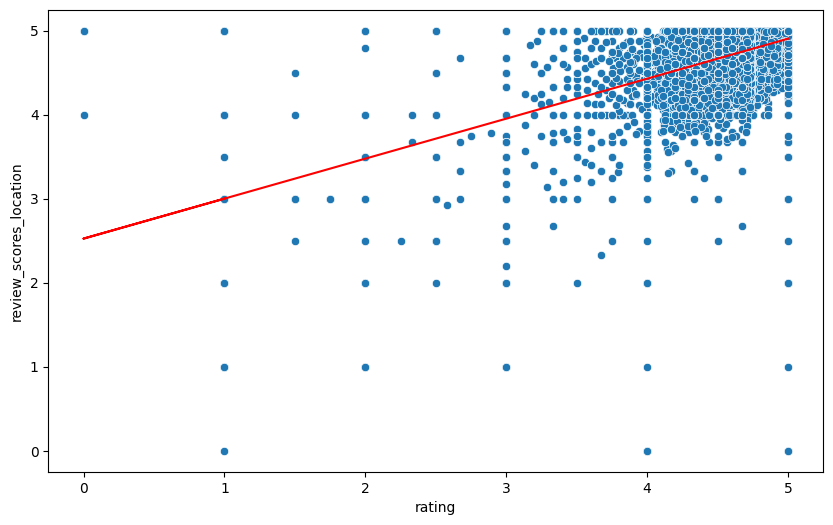

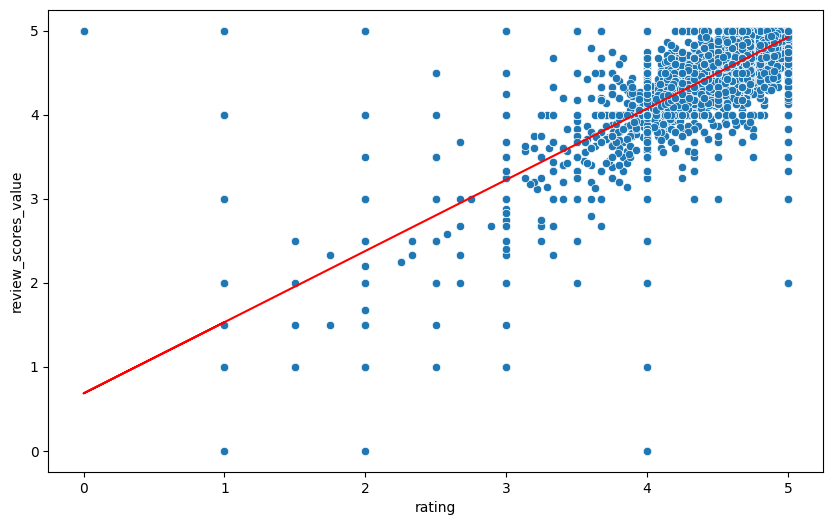

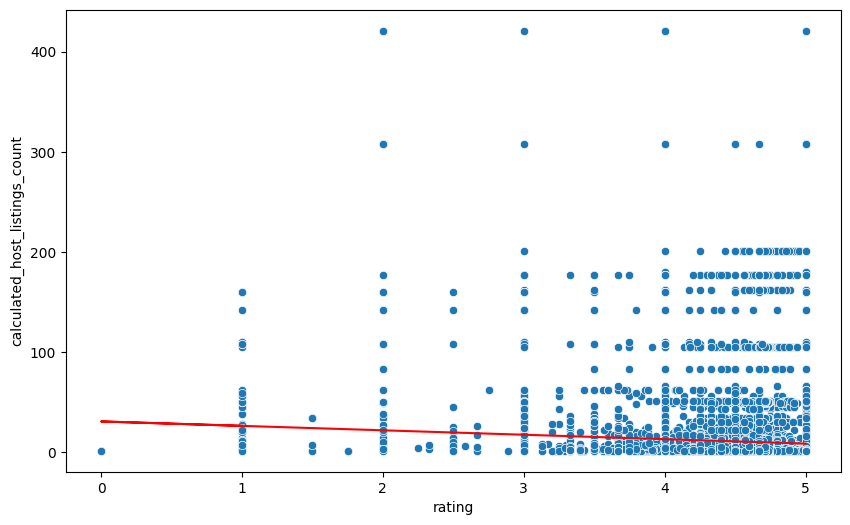

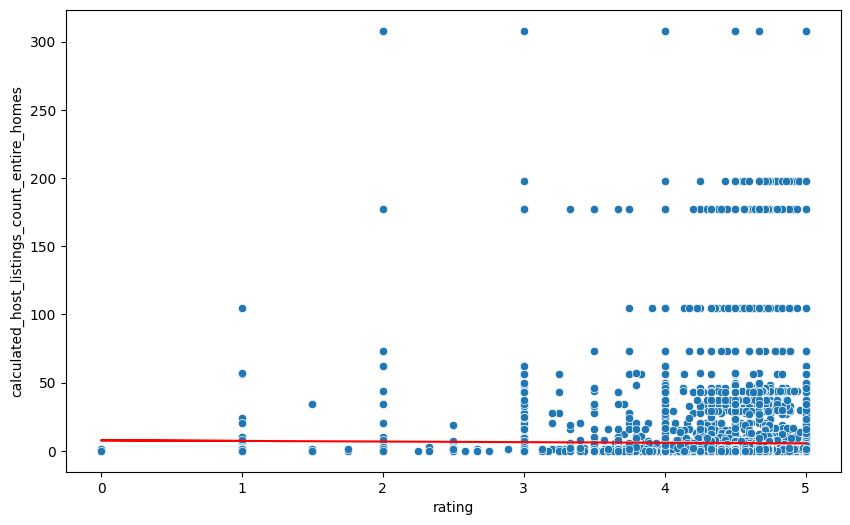

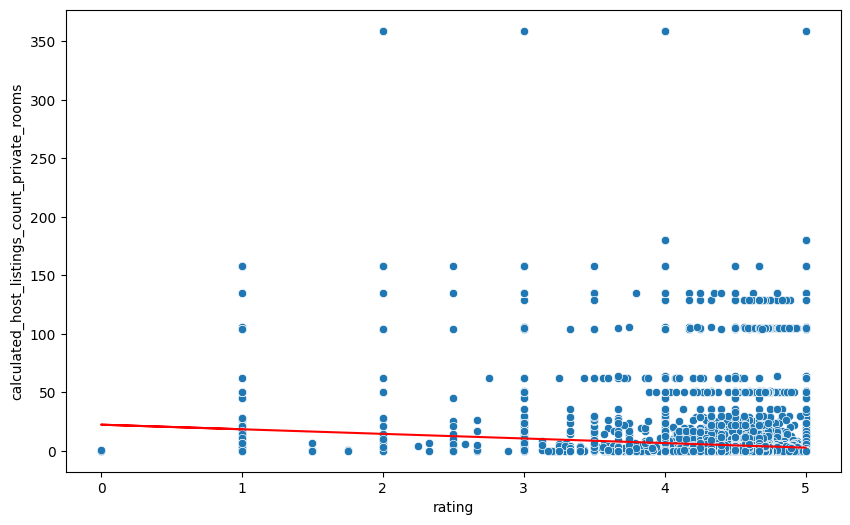

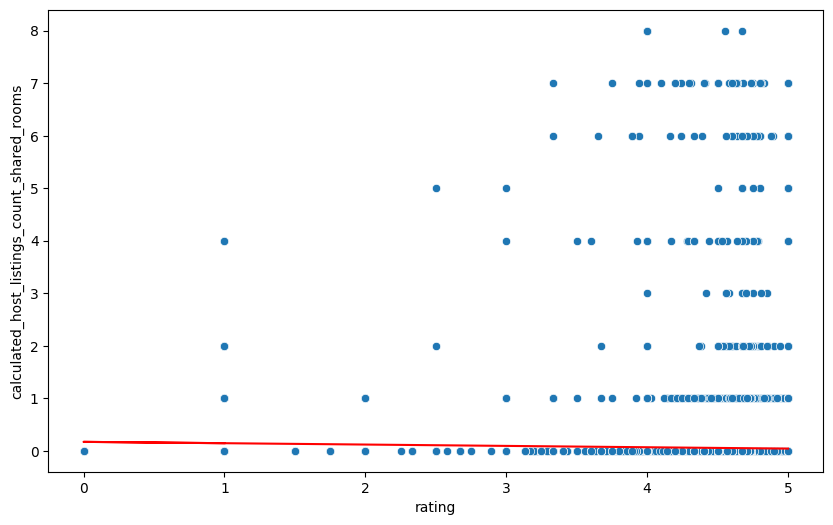

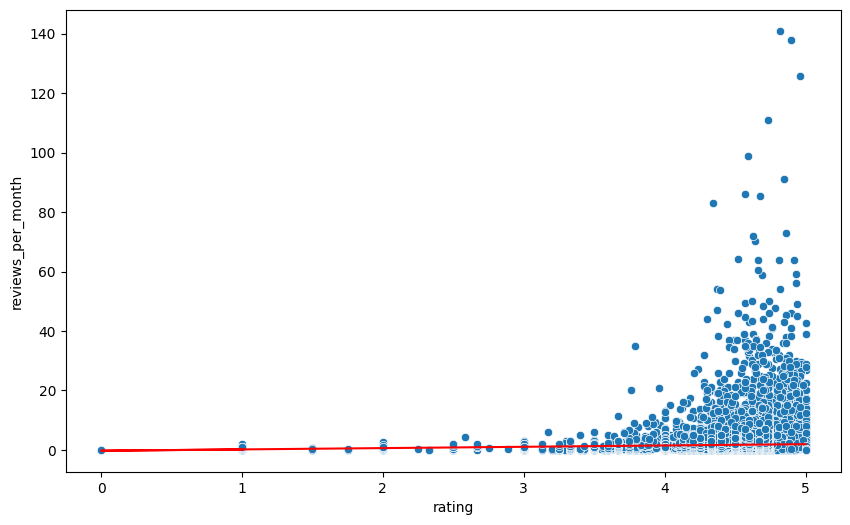

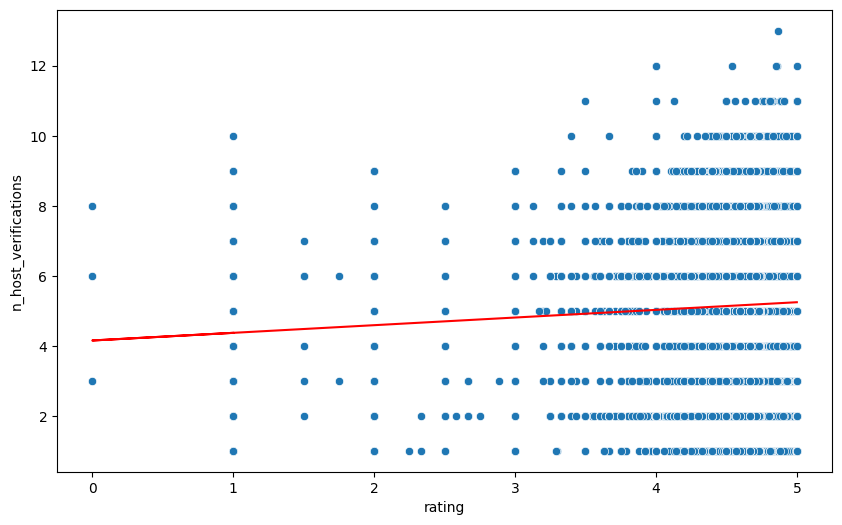

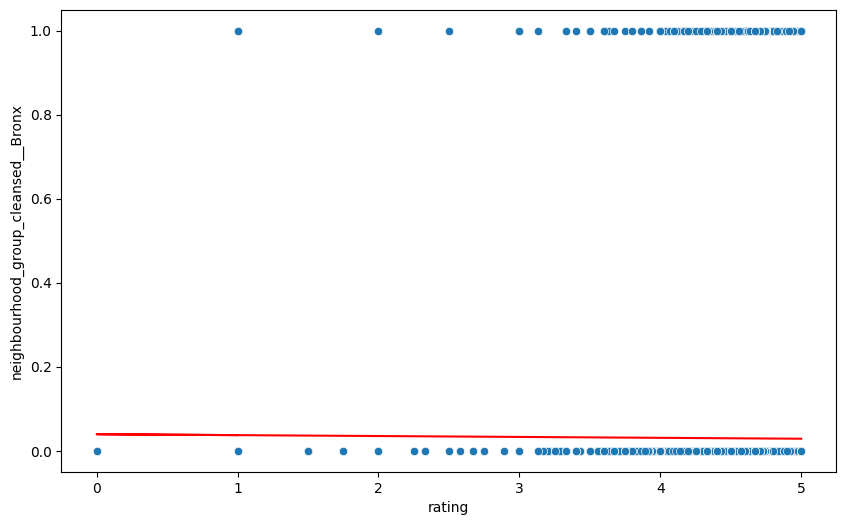

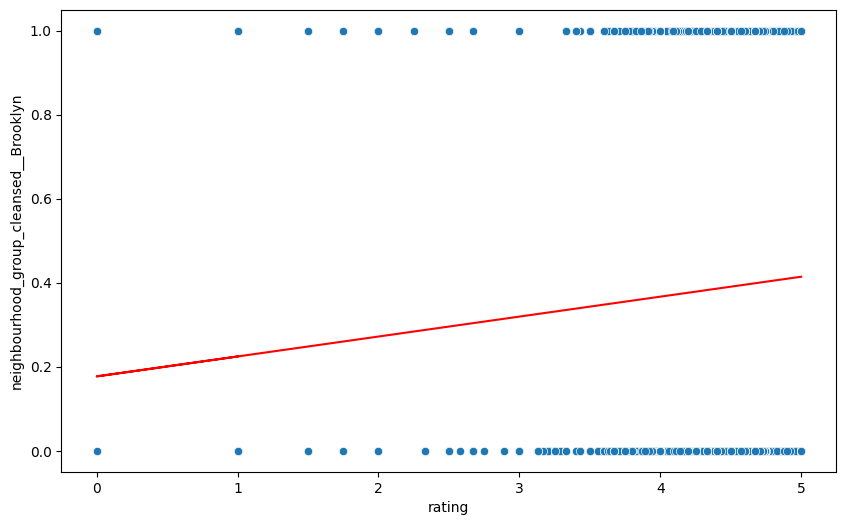

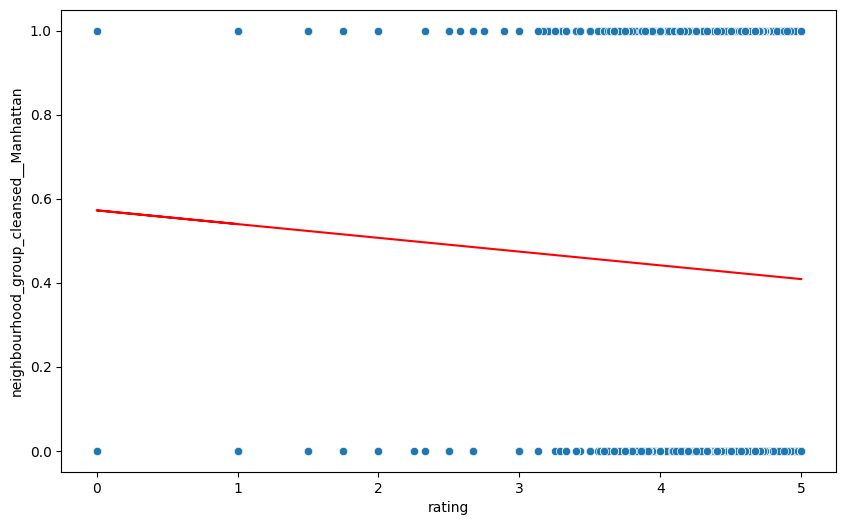

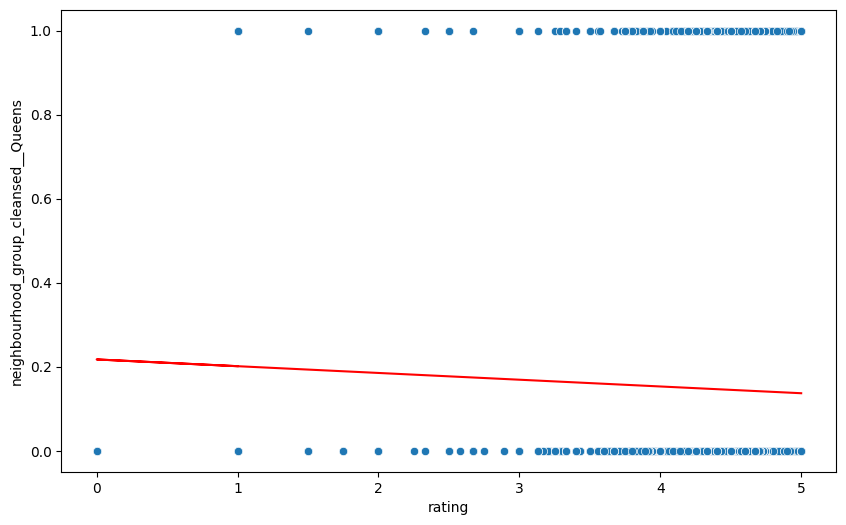

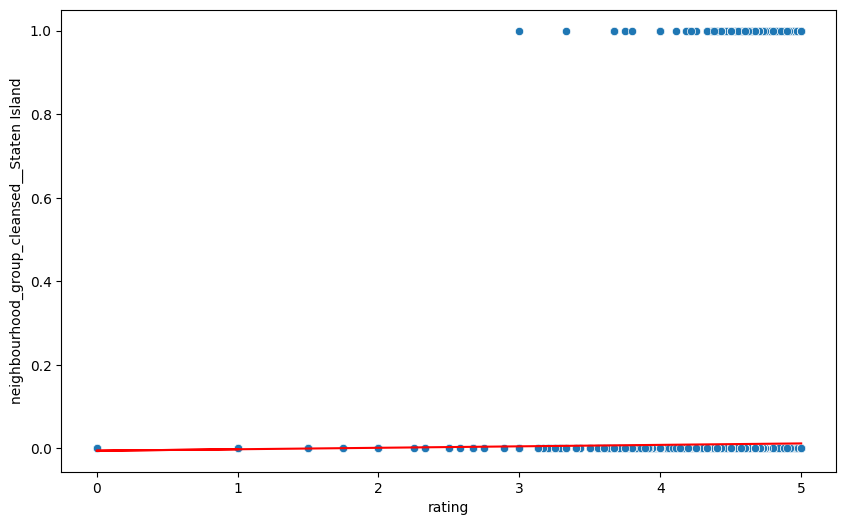

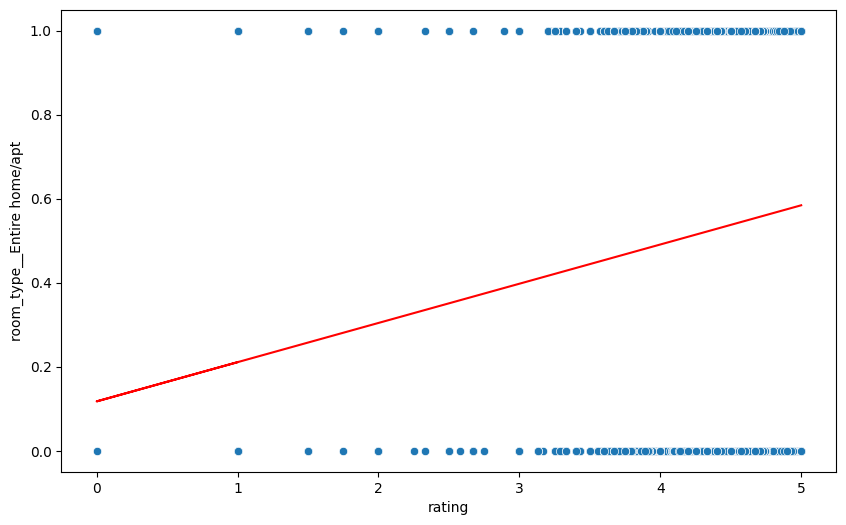

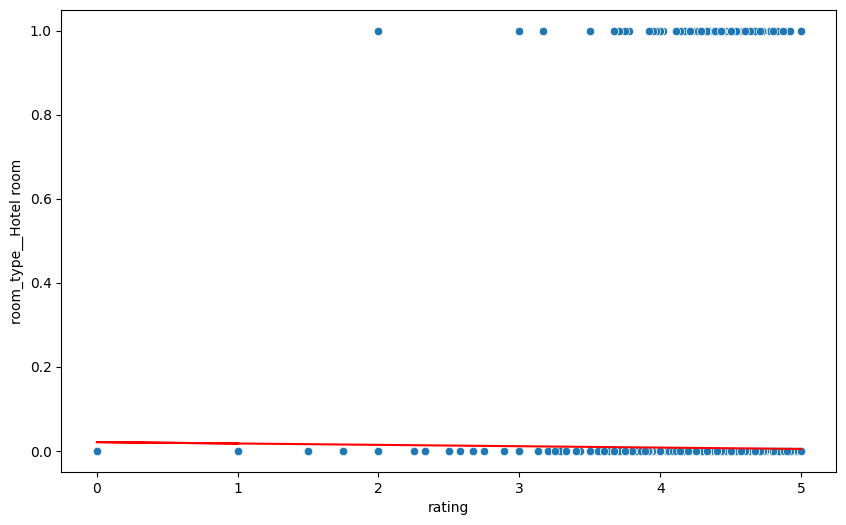

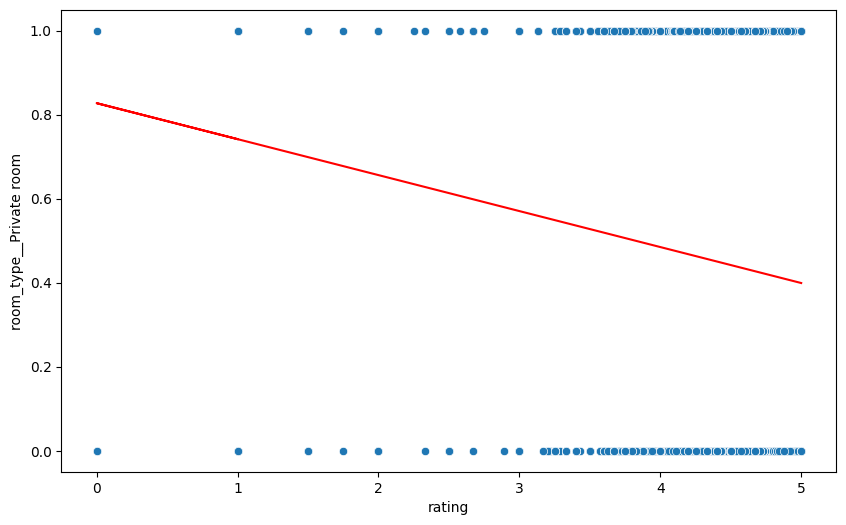

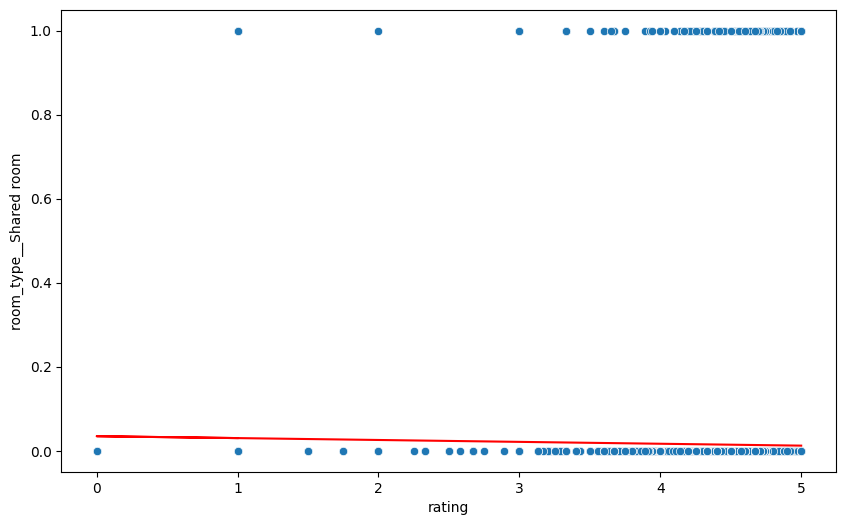

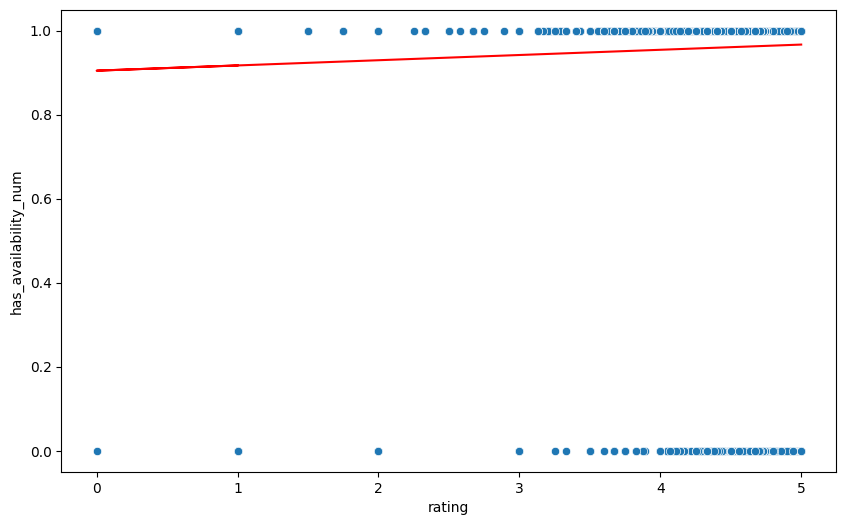

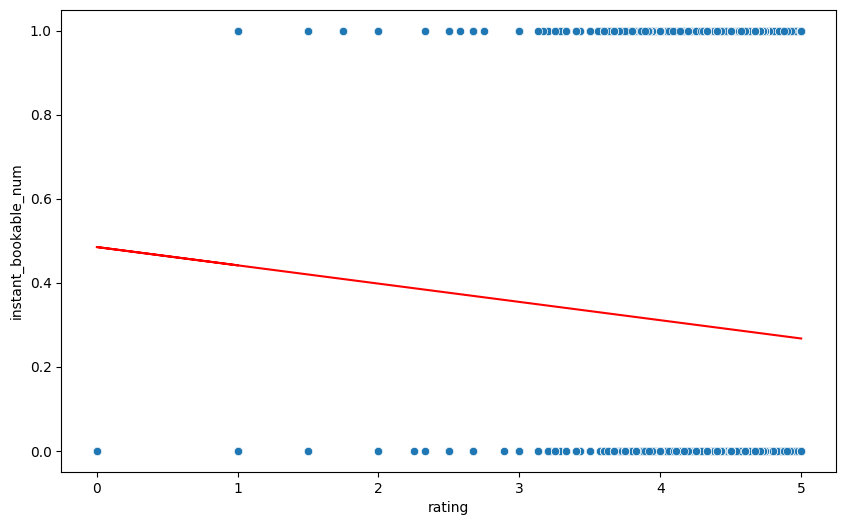

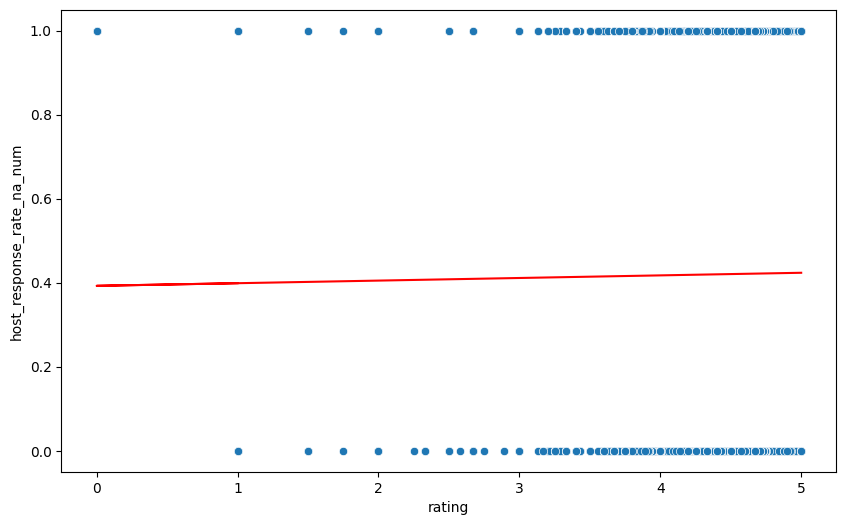

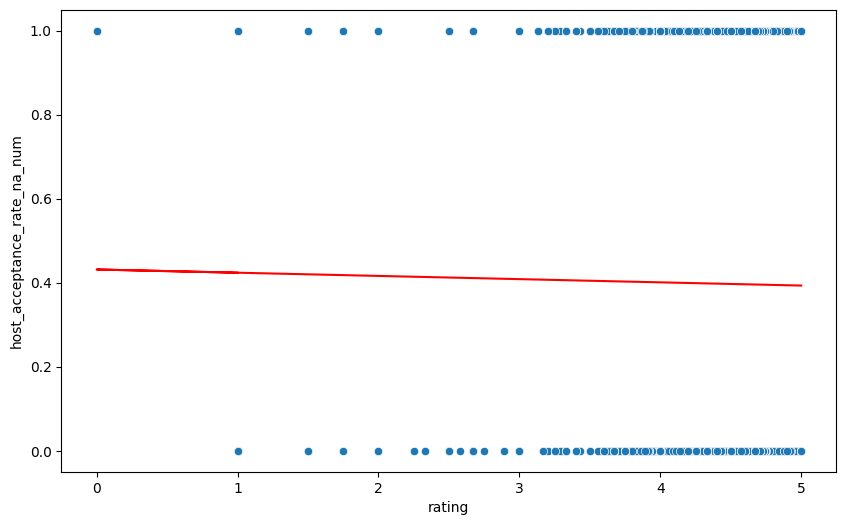

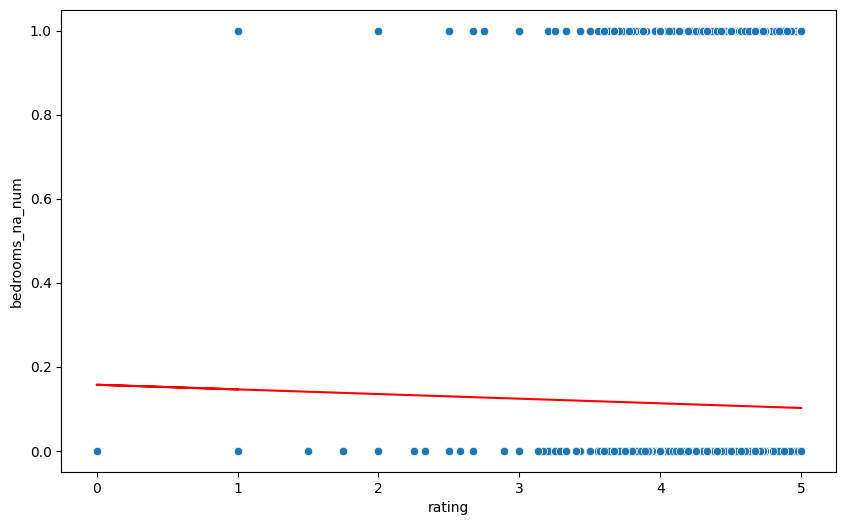

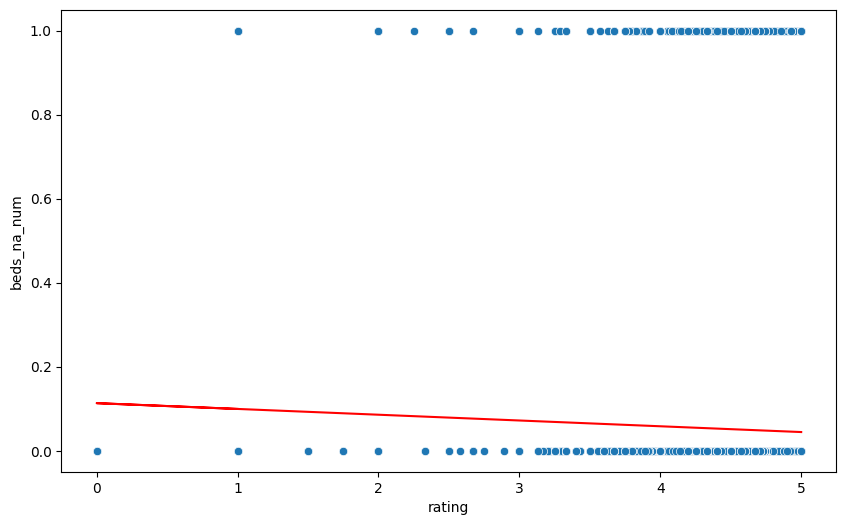

In [35]:
#linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
print(lr_rmse)
lr_r2 = r2_score(y_test, pred_lr)
print(lr_r2)
for col in X.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_balanced['review_scores_rating'], y=df_balanced[col])
    y = df_balanced[col].values
    x = df_balanced['review_scores_rating'].values
    coeffs = np.polyfit(x, y, 1)
    plt.plot(x, np.polyval(coeffs, x), color='red')
    plt.ylabel(col)
    plt.xlabel('rating')
    plt.show()

In [36]:
#random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=1234)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
print(rf_mae)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(rf_rmse)
rf_r2 = r2_score(y_test, rf_pred)
print(rf_r2)

0.13300221477759164
0.24959823819854648
0.8017086929173495


In [44]:
#gradient boosting
param_grid = {
    'n_estimators': [40, 50],
    'max_depth': [5,7],
    'learning_rate': [0.05, 0.075]
}
model = GradientBoostingRegressor(random_state=1234)
kf = KFold(n_splits=5, shuffle=True, random_state=1234)
print("Starting search")
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error') 
print("Ended search")

Starting search
Ended search


In [45]:
print('start fit')
grid_search.fit(X_train, y_train)
print('end fit')
gb_model = grid_search.best_estimator_
print(grid_search.best_params_)
gb_pred = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
print(gb_mae)
gb_rmse = -1 * grid_search.best_score_
print(gb_rmse)
gb_r2 = r2_score(y_test, gb_pred)
print(gb_r2)

start fit
end fit
{'learning_rate': 0.075, 'max_depth': 5, 'n_estimators': 50}
0.13436264446708804
0.060027161505999974
0.8121583607992566
